In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# A1
import numpy as np
import librosa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense

In [ ]:
def extract_features(audio_file, feature='mfcc', n_mfcc=13):
    y, sr = librosa.load(audio_file)
    if feature == 'stft':
        feature = np.abs(librosa.stft(y))
    elif feature == 'mfcc':
        feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    elif feature == 'lpc':
        feature = librosa.lpc(y, order=n_mfcc)
    return feature

In [7]:
# Load data
bhanumathi_weds_rajat_features = extract_features('/content/drive/MyDrive/Colab Notebooks/Other tasks/recorded_speech.wav')
bharat_features = extract_features('/content/drive/MyDrive/Colab Notebooks/Other tasks/Bharat.wav')

In [8]:
# Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=bhanumathi_weds_rajat_features.shape))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train model (assuming labels are available)
# model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate model
# loss, accuracy = model.evaluate(X_test, y_test)

# Use the model for speech recognition task
# predicted_labels = model.predict(test_data)

In [10]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [11]:
# Function to extract features (STFT, MFCC, LPC coefficients) from audio files
def extract_features(audio_file, feature='mfcc', n_mfcc=13):
    y, sr = librosa.load(audio_file)
    if feature == 'stft':
        feature = np.abs(librosa.stft(y))
    elif feature == 'mfcc':
        feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    elif feature == 'lpc':
        feature = librosa.lpc(y, order=n_mfcc)
    return feature, sr

In [13]:
# Load data and extract features
bhanumathi_weds_rajat_features, sr1 = extract_features('/content/drive/MyDrive/Colab Notebooks/Other tasks/recorded_speech.wav')
bharat_features, sr2 = extract_features('/content/drive/MyDrive/Colab Notebooks/Other tasks/Bharat.wav')

In [14]:
# Plot the signals
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

Text(26.722222222222214, 0.5, 'Amplitude')

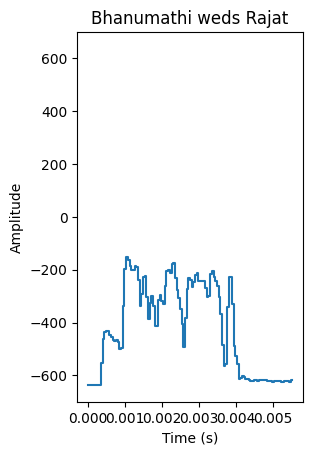

In [15]:
# Plot Bhanumathi weds Rajat
plt.subplot(1, 2, 1)
librosa.display.waveshow(bhanumathi_weds_rajat_features, sr=sr1)
plt.title('Bhanumathi weds Rajat')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

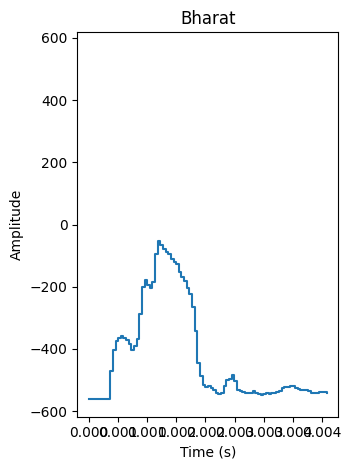

In [16]:
# Plot Bharat
plt.subplot(1, 2, 2)
librosa.display.waveshow(bharat_features, sr=sr2)
plt.title('Bharat')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [17]:
# A2

import numpy as np
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt

In [19]:
# Define phonemes for "Bharat" along with their durations
phonemes_bharat = ['B', 'AA', 'R', 'AH', 'T']
phoneme_durations_bharat = [0.69, 0.72, 0.77, 0.83, 0.9]

In [21]:
synthesized_audio = np.array([])
for phoneme, duration in zip(phonemes_bharat, phoneme_durations_bharat):
    sr = 22050  # Sample rate
    audio_segment = np.random.randn(int(sr * duration)) * 0.5  # Generate white noise

    # Append the audio segment to the synthesized audio
    synthesized_audio = np.append(synthesized_audio, audio_segment)

# Save synthesized audio to a file using soundfile
sf.write('synthesized_bharat.wav', synthesized_audio, sr)

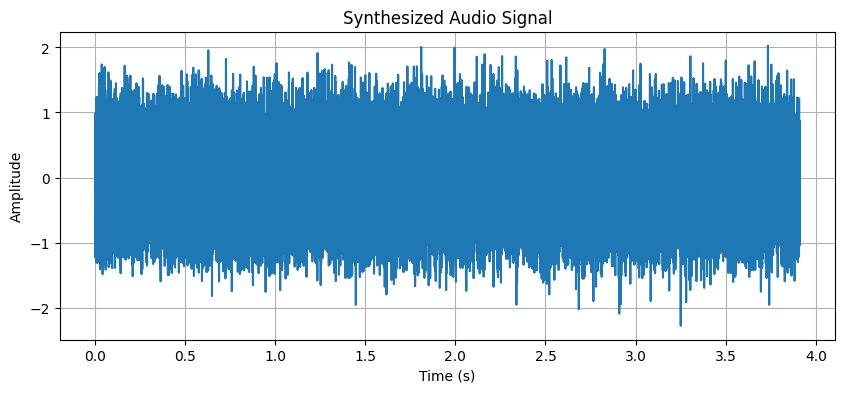

In [22]:
# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(synthesized_audio)) / sr, synthesized_audio)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Synthesized Audio Signal')
plt.grid(True)
plt.show()

# Listen to the synthesized audio
ipd.Audio('synthesized_bharat.wav')